In [1]:
filename = "X:/MSI_Shared_Data/13CImagingManuscript/LC-MS_Data/Non-perfused_brains_FA_isotopologues_corrected_for_ISA.csv" #path to datafile

In [2]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import os
matplotlib.rcParams['figure.dpi'] = 100
import seaborn as sb
import SIMSIToolBox


In [3]:
data = pd.read_csv(filename)
data

,Compound,C_Label,pHILIC_Brain4.1_LH2.Area,pHILIC_Brain4.2_LH1.Area,pHILIC_Brain4.3_LH2.Area,pHILIC_Brain4.4_LH4.Area,pHILIC_Brain4.1_RH2.Area,pHILIC_Brain4.2_RH1.Area,pHILIC_Brain4.3_RH2.Area,pHILIC_Brain4.4_RH4.Area
0,16:0 Palmitic acid,0,0.712369,0.760110,0.719937,0.698481,0.747677,0.744140,0.733363,0.751968
1,16:0 Palmitic acid,1,0.000000,0.002620,0.000000,0.000000,0.000000,0.002043,0.000000,0.000000
2,16:0 Palmitic acid,2,0.001199,0.017289,0.000000,0.004831,0.000000,0.013991,0.000000,0.000000
3,16:0 Palmitic acid,3,0.003807,0.012434,0.002161,0.005831,0.002416,0.011528,0.001893,0.003609
4,16:0 Palmitic acid,4,0.013372,0.022218,0.009128,0.016513,0.010445,0.018362,0.007084,0.010834
5,16:0 Palmitic acid,5,0.009843,0.012824,0.006522,0.012724,0.008005,0.013019,0.005450,0.006646
6,16:0 Palmitic acid,6,0.026497,0.022937,0.021871,0.029685,0.021607,0.021246,0.015900,0.018984
7,16:0 Palmitic acid,7,0.018543,0.013866,0.013668,0.019019,0.013050,0.013843,0.012352,0.014028
8,16:0 Palmitic acid,8,0.041186,0.025341,0.034725,0.038277,0.034651,0.026211,0.032154,0.030271
9,16:0 Palmitic acid,9,0.021238,0.014863,0.021102,0.023125,0.018304,0.015328,0.018221,0.018881


In [4]:
samps = [x for x in data.columns.values if "Area" in x]

In [5]:
fluxes = {}
for samp in samps:
    fluxes[samp] = {}

In [6]:
plt_df = {}

In [7]:
met = "16:0 Palmitic acid"
numCarbons = 16

filt = data[data["Compound"] == met]
filt = filt.sort_values(by="C_Label")
filt = filt.set_index("C_Label")
filt = filt[samps]

exprList = SIMSIToolBox.generateISAExpressions(SIMSIToolBox.getISAEq(numCarbons),numCarbons)

for samp in fluxes:
    P = np.zeros(numCarbons+1)
    for index,row in filt.iterrows():
        P[index] = row[samp]
    g, e,D, T,err, P_pred = SIMSIToolBox.ISAFit([1.0,0,0],[1.0,0,0],P,exprList,filt.index.values,np.array([0.5]))
    
    for x in filt.index.values:
        plt_df[len(plt_df)] = {"iso":x,"met":met,"frac":P_pred[x],"type":"fit","sample":samp}
    for x in filt.index.values:
        plt_df[len(plt_df)] = {"iso":x,"met":met,"frac":P[x],"type":"obs","sample":samp}
    
    fluxes[samp]["palm_g"] = g
    fluxes[samp]["palm_x0"] = T[0]
    fluxes[samp]["palm_x1"] = T[1]
    fluxes[samp]["palm_x2"] = T[2]


In [8]:
met = "18:0 Stearic acid"
numCarbons = 18

filt = data[data["Compound"] == met]
filt = filt.sort_values(by="C_Label")
filt = filt.set_index("C_Label")
filt = filt[samps]

exprList = SIMSIToolBox.generateISAExpressions(SIMSIToolBox.getISAEq(numCarbons),numCarbons)

for samp in fluxes:
    P = np.zeros(numCarbons+1)
    for index,row in filt.iterrows():
        P[index] = row[samp]
    g, e,D, T,err, P_pred = SIMSIToolBox.ISAFit_e_g([1.0,0,0],[1.0,0,0],P,exprList,filt.index.values,np.array([0.33,0.33,0.33]))
    
    for x in filt.index.values:
        plt_df[len(plt_df)] = {"iso":x,"met":met,"frac":P_pred[x],"type":"fit","sample":samp}
    for x in filt.index.values:
        plt_df[len(plt_df)] = {"iso":x,"met":met,"frac":P[x],"type":"obs","sample":samp}
    
    fluxes[samp]["stear_g"] = g
    fluxes[samp]["stear_e"] = e
    fluxes[samp]["stear_x0"] = T[0]
    fluxes[samp]["stear_x1"] = T[1]
    fluxes[samp]["stear_x2"] = T[2]


In [9]:
fluxes = pd.DataFrame.from_dict(fluxes,orient="index")
fluxes

,palm_g,palm_x0,palm_x1,palm_x2,stear_g,stear_e,stear_x0,stear_x1,stear_x2
pHILIC_Brain4.1_LH2.Area,0.285281,0.374577,0.061750,0.563673,0.081360,0.092956,0.361048,0.047226,0.591725
pHILIC_Brain4.2_LH1.Area,0.234596,0.451665,0.074725,0.473611,0.076207,0.067172,0.402634,0.056597,0.540769
pHILIC_Brain4.3_LH2.Area,0.277750,0.334889,0.061187,0.603924,0.080157,0.081090,0.316977,0.043672,0.639351
pHILIC_Brain4.4_LH4.Area,0.298202,0.381616,0.067130,0.551255,0.105416,0.085236,0.385823,0.053806,0.560371
pHILIC_Brain4.1_RH2.Area,0.250180,0.354717,0.061223,0.584061,0.068927,0.096636,0.338210,0.040485,0.621305
pHILIC_Brain4.2_RH1.Area,0.249834,0.380118,0.070371,0.549511,0.076771,0.084477,0.360084,0.064547,0.575369
pHILIC_Brain4.3_RH2.Area,0.264354,0.313432,0.056236,0.630332,0.072904,0.090119,0.287959,0.047059,0.664982
pHILIC_Brain4.4_RH4.Area,0.245407,0.342201,0.064646,0.593153,0.070551,0.092955,0.337443,0.044192,0.618365


In [10]:
plt_df = pd.DataFrame.from_dict(plt_df,orient="index")
plt_df

,iso,met,frac,type,sample
0,0,16:0 Palmitic acid,0.714830,fit,pHILIC_Brain4.1_LH2.Area
1,1,16:0 Palmitic acid,0.000146,fit,pHILIC_Brain4.1_LH2.Area
2,2,16:0 Palmitic acid,0.001415,fit,pHILIC_Brain4.1_LH2.Area
3,3,16:0 Palmitic acid,0.001564,fit,pHILIC_Brain4.1_LH2.Area
4,4,16:0 Palmitic acid,0.007776,fit,pHILIC_Brain4.1_LH2.Area
...,...,...,...,...,...
571,14,18:0 Stearic acid,0.009980,obs,pHILIC_Brain4.4_RH4.Area
572,15,18:0 Stearic acid,0.003407,obs,pHILIC_Brain4.4_RH4.Area
573,16,18:0 Stearic acid,0.005959,obs,pHILIC_Brain4.4_RH4.Area
574,17,18:0 Stearic acid,0.000666,obs,pHILIC_Brain4.4_RH4.Area


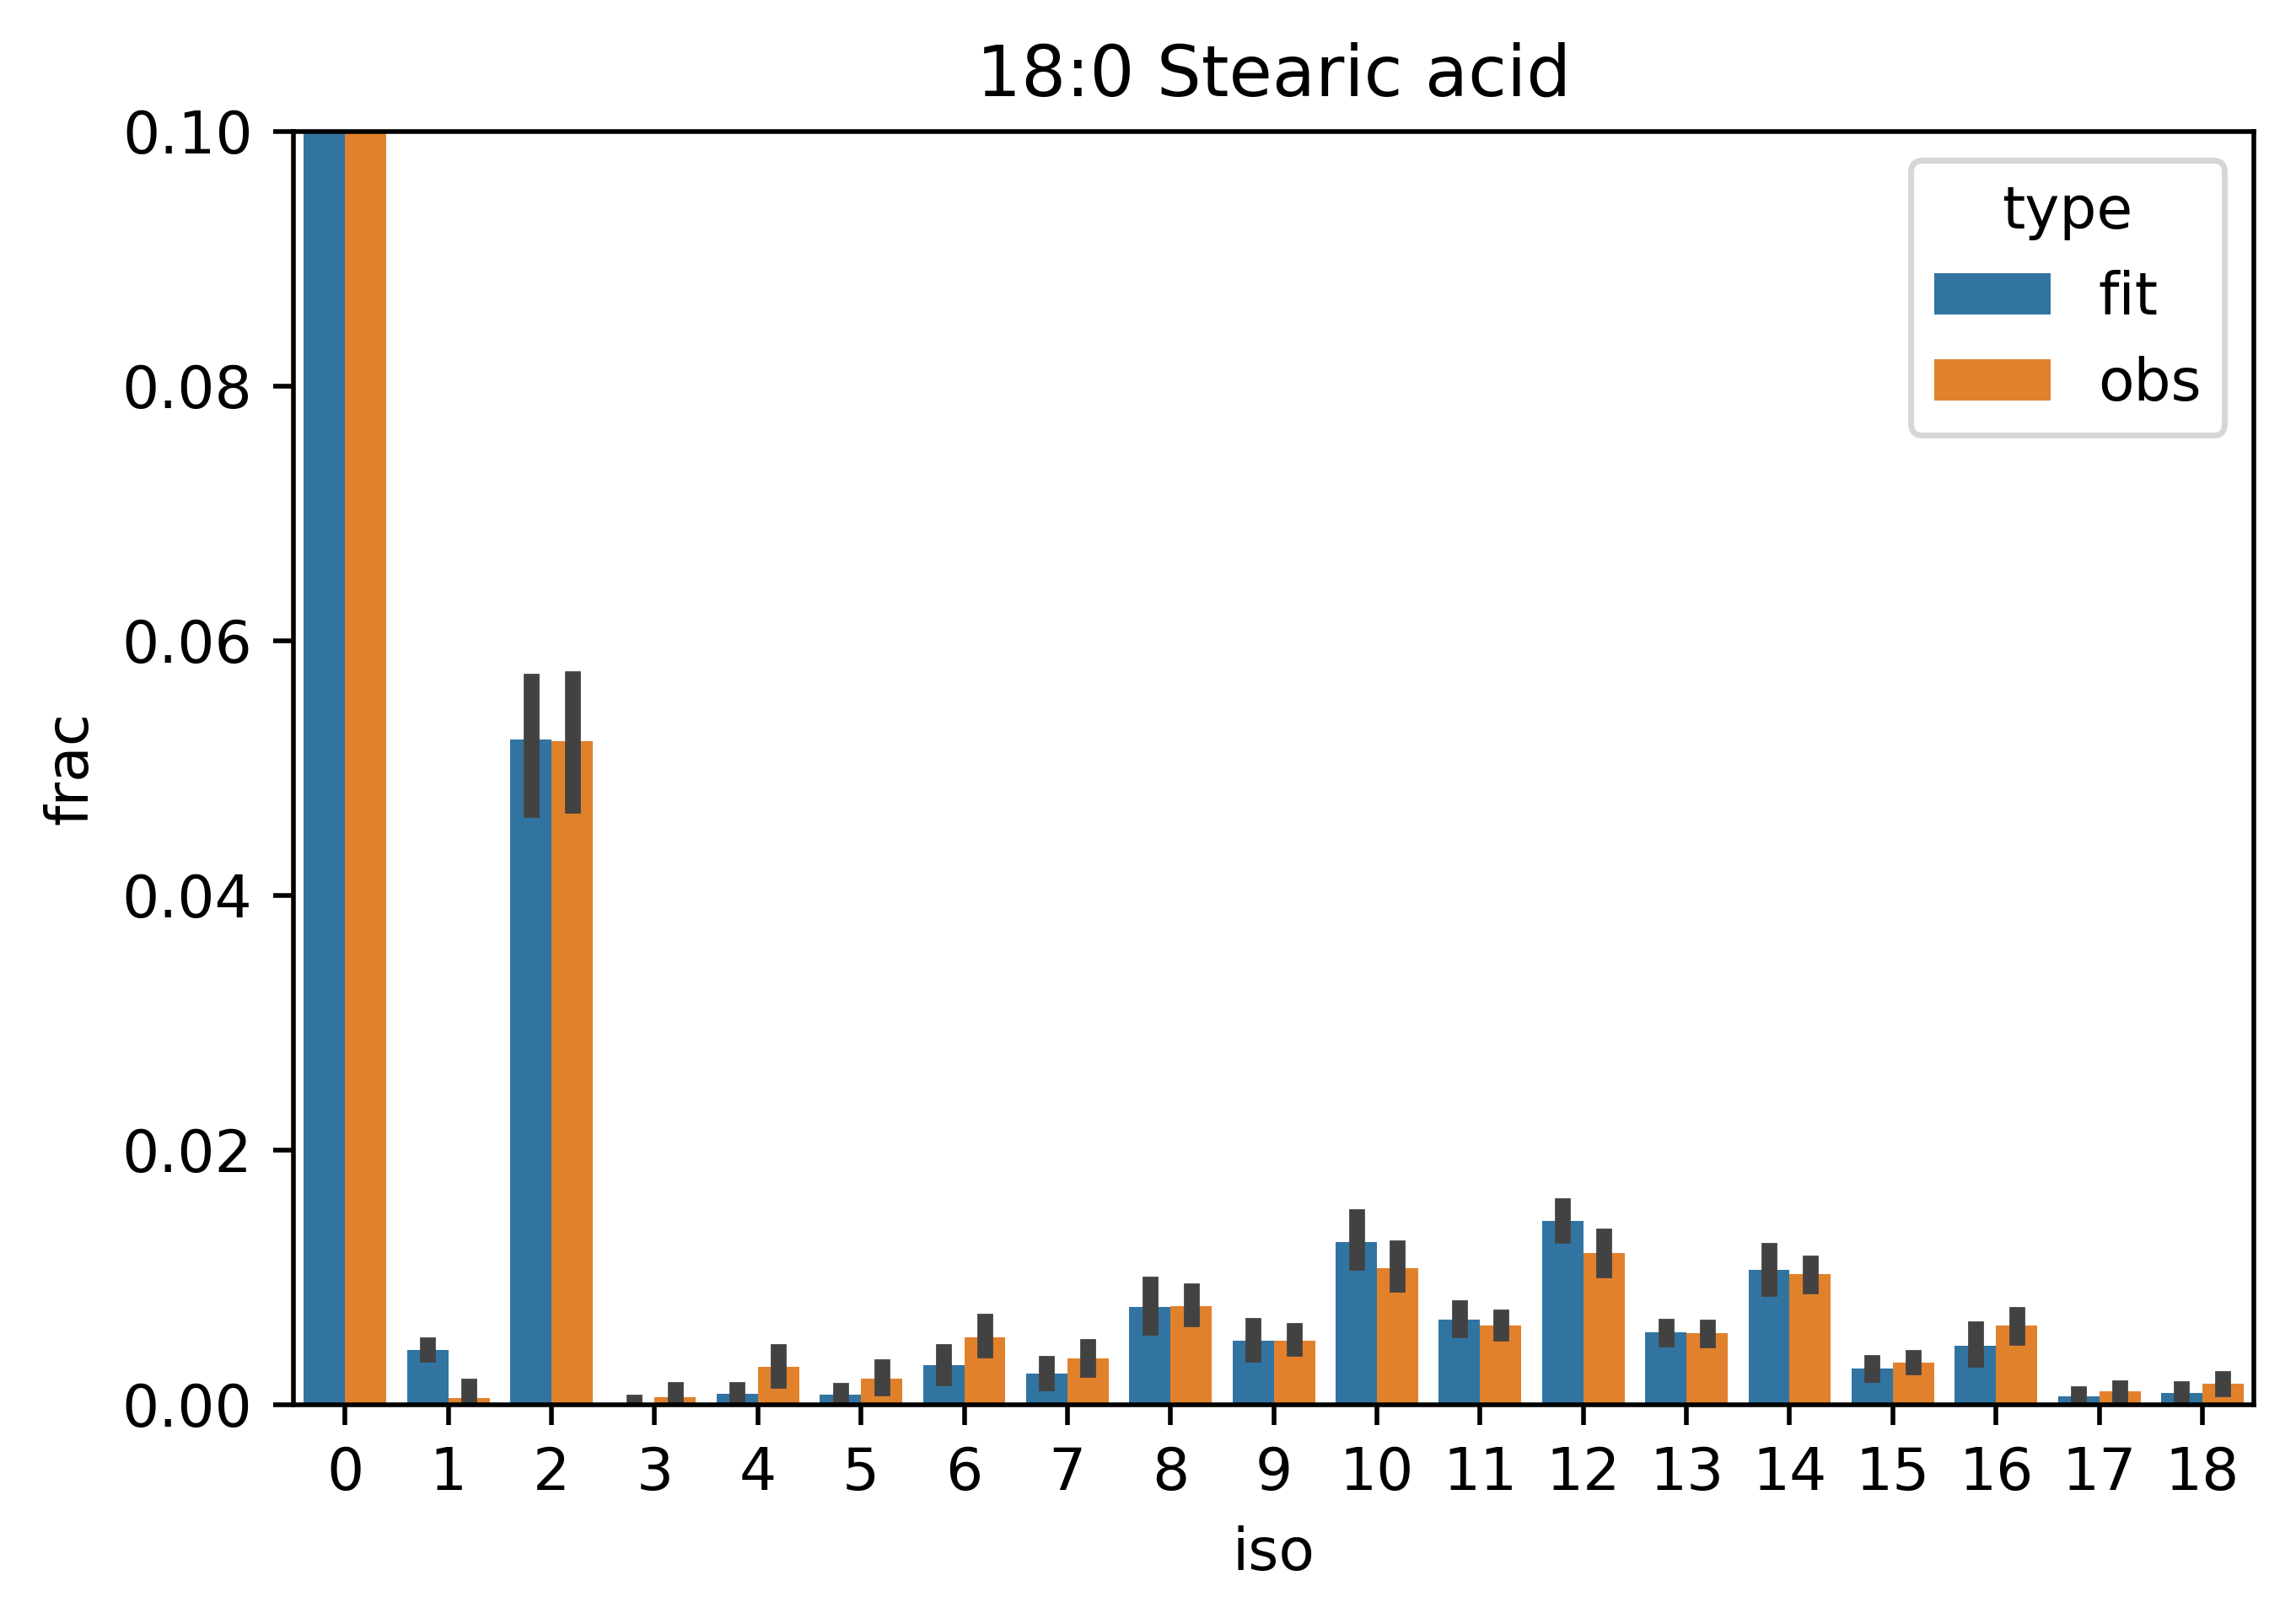

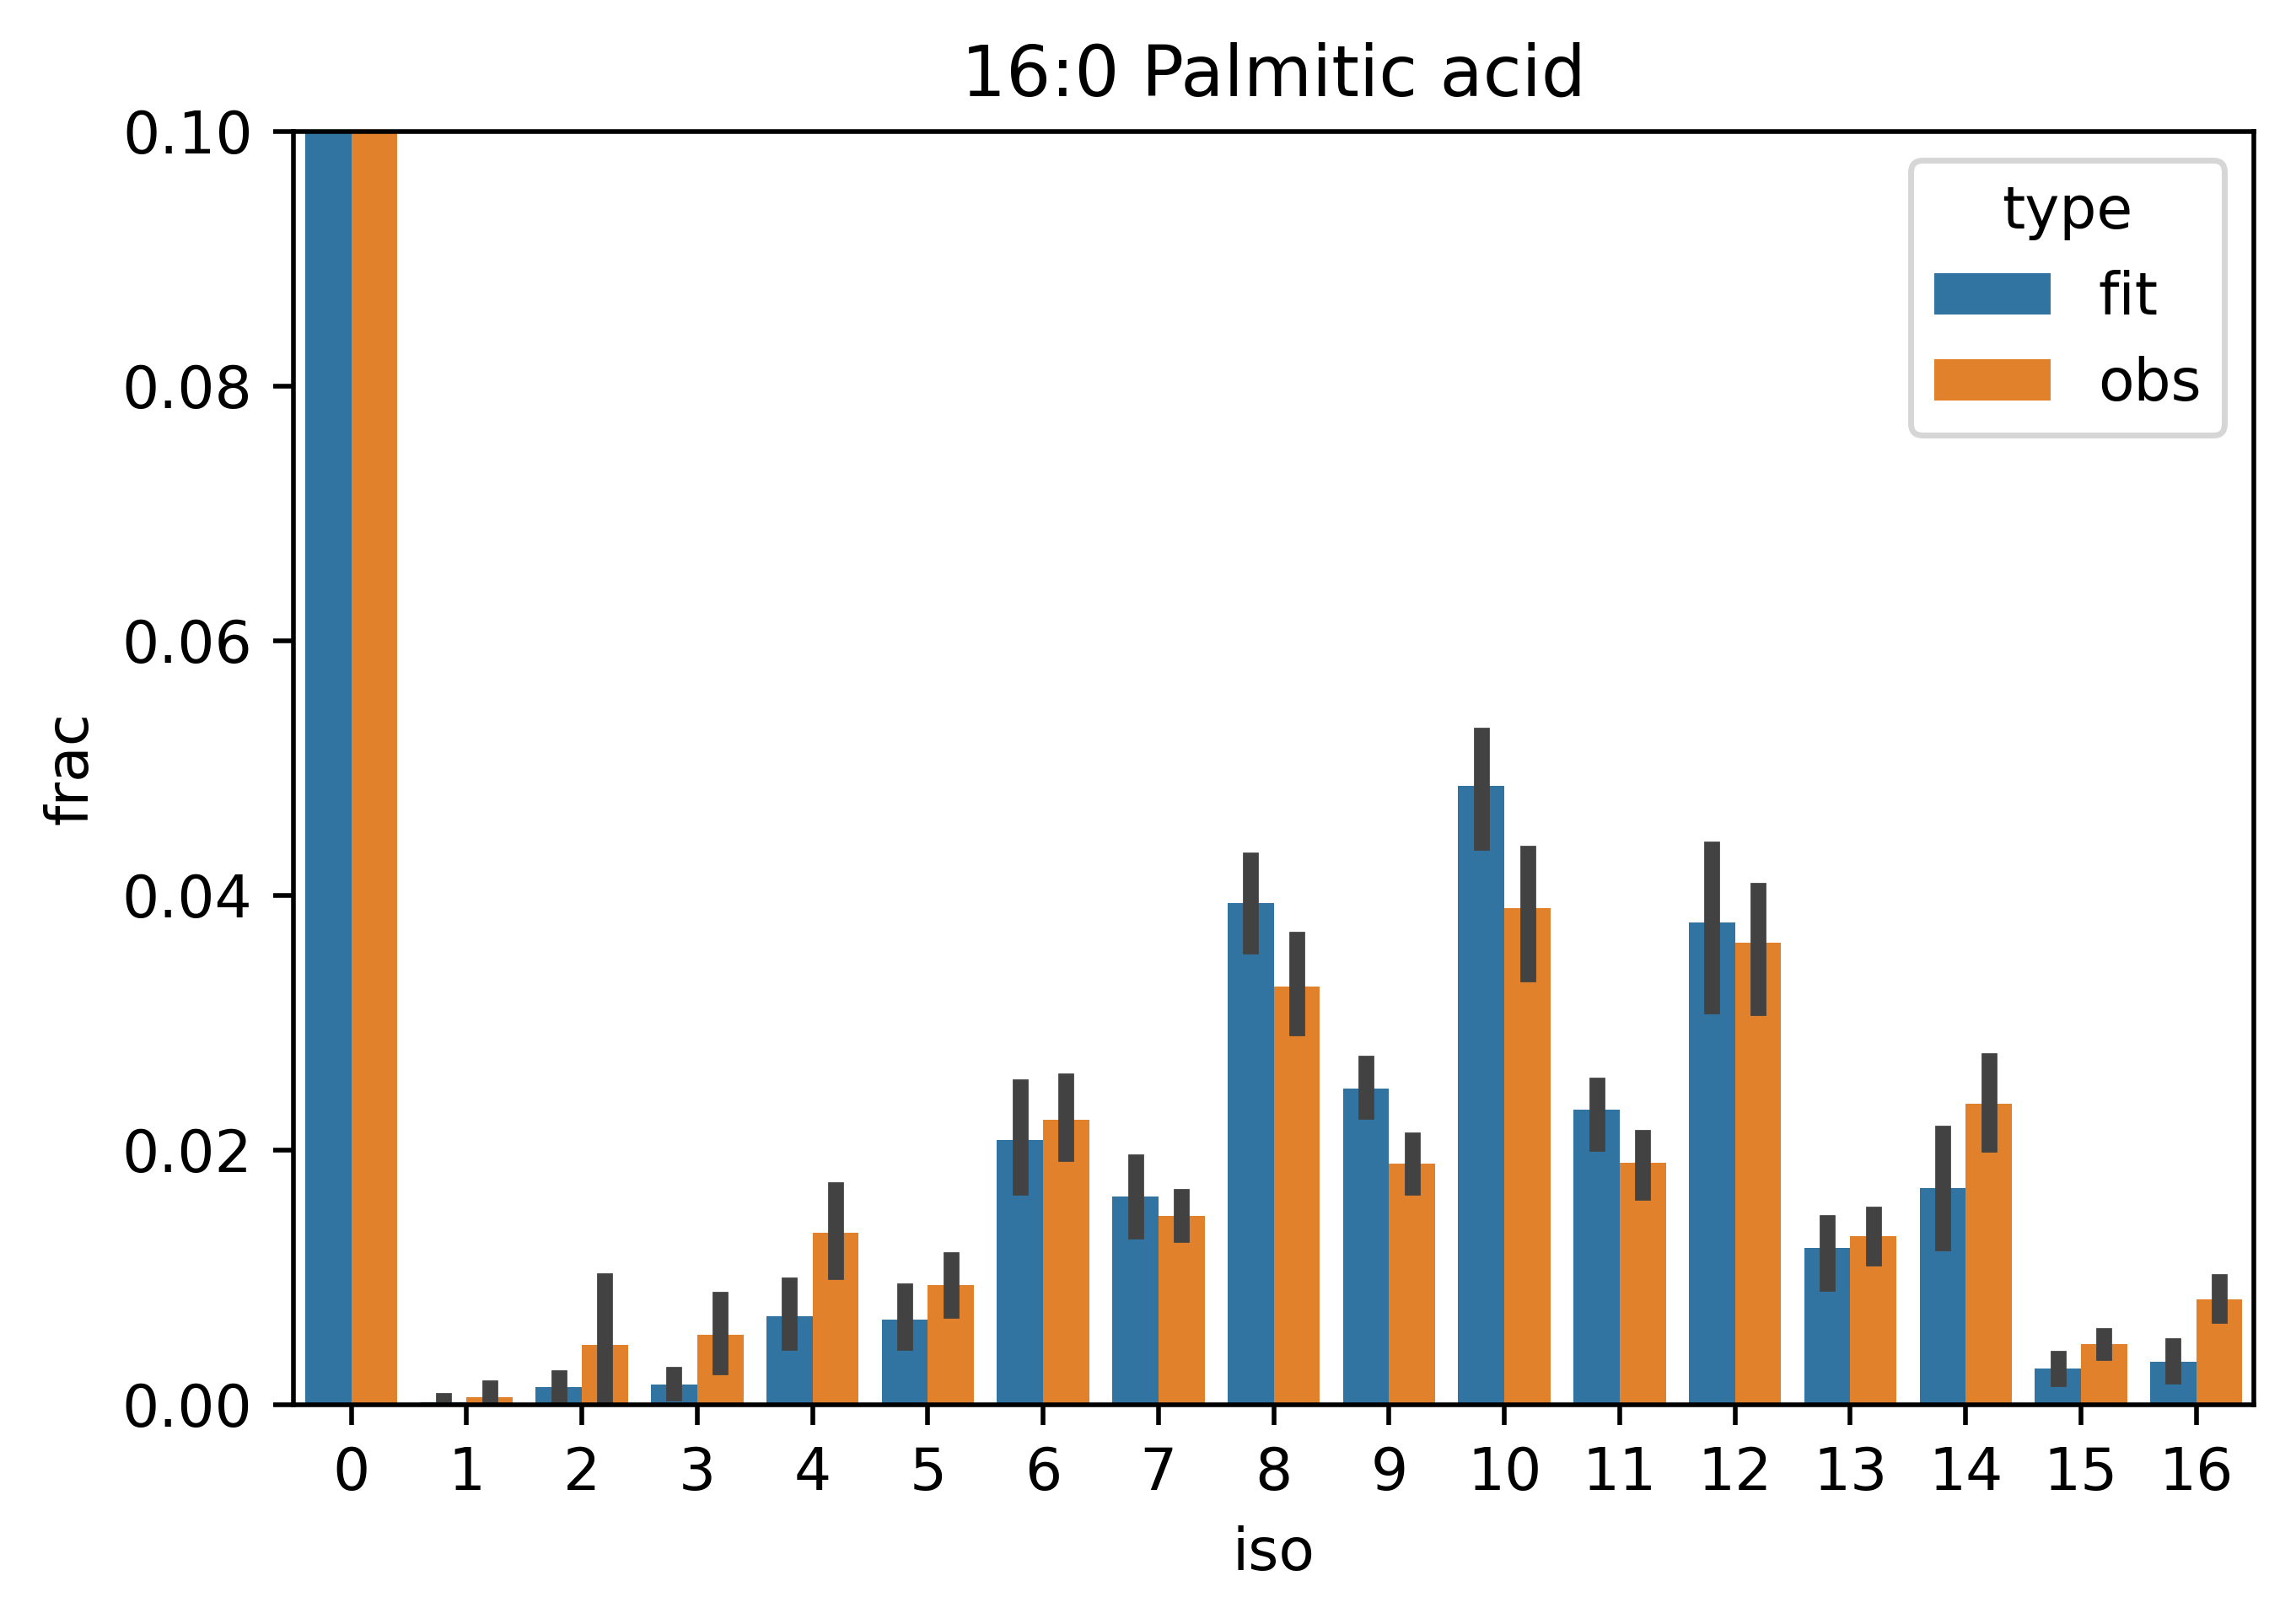

In [11]:
for met in list(set(plt_df["met"].values)):
    filt = plt_df[plt_df['met'] == met]
    plt.figure()
    sb.barplot(data=filt,x="iso",y="frac",hue="type")
    plt.title(met)
    plt.ylim((0.0,0.1))

In [12]:
fluxes.to_csv("X:/MSI_Shared_Data/13CImagingManuscript/LC-MS_Data/ISA_result_LCMS.csv")